Preprocessing

In [5]:
import skimage as ski
import numpy as np
import os
from skimage.transform import rescale, resize, downscale_local_mean

data = []
labels = []
images = []
label = 0

for folder in os.listdir("Datasets/unsynth"):
    # nb = 0
    for file in os.listdir("Datasets/unsynth/" + folder):
        # nb += 1
        # if nb >= 10:
        #     break
        img = ski.io.imread("Datasets/unsynth/" + folder + "/" + file)
        imgResized = resize(img, (500,500))
        images.append(imgResized)
        #prep = imgResized.astype(float)
        prep = imgResized.astype(np.uint8)
        prep = np.ndarray.flatten(prep)
        data.append(prep)
        labels.append(label)
    label+=1

In [2]:
print(type(data[0][0]))

<class 'numpy.float64'>


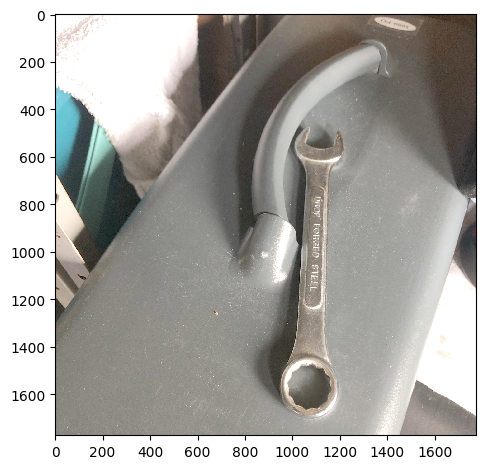

In [4]:
from matplotlib import pyplot as plt
from skimage import io
from skimage import exposure
import os
import skimage as ski
for folder in os.listdir("Datasets/unsynth"):
    # nb = 0
    for file in os.listdir("Datasets/unsynth/" + folder):
        # nb += 1
        # if nb >= 10:
        #     break
        img = ski.io.imread("Datasets/unsynth/" + folder + "/" + file)
        img = exposure.adjust_gamma(img, 0.5)
        io.imshow(img)
        plt.show()
        break
    break

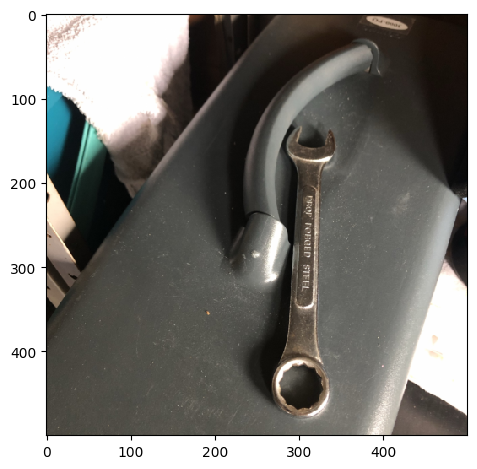

In [4]:
from matplotlib import pyplot as plt
from skimage import io
down_scaled_image = resize(images[0], (500, 500))
io.imshow(down_scaled_image)
plt.show()


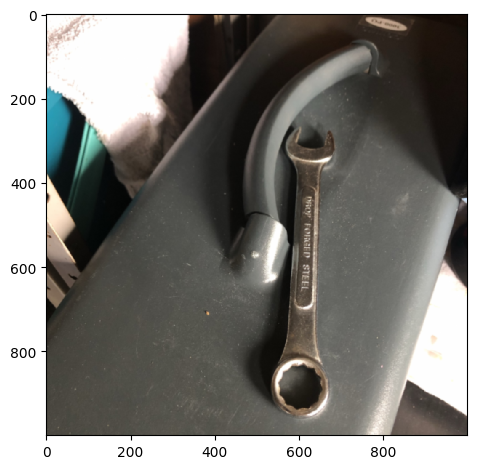

In [5]:
from matplotlib import pyplot as plt
from skimage import io
down_scaled_image = resize(images[0], (1000, 1000))
io.imshow(down_scaled_image)
plt.show()
#niet zoveel verschil in kwaliteit maar wel merkbaar minder geheugen nodig (1/4)
#45% geheugen is nodig om de images in te laden
#* 8 = 280% van mijn RAM
#eens proberen met alleen rotaten? maal 4 ipv maal 8 -> 140%
#dit delen door 4 is 45%, zou moeten lukken

In [2]:
from skimage import io
from skimage.transform import rotate
from matplotlib import pyplot as plt
from numpy import flipud

newImages = []
newLabels = []
rotations = [0, 90, 180, 270]
for i in range(len(images)):
    originalImage = images[i]
    for rotation in rotations:
        rotatedImage = rotate(originalImage, rotation)
        newImages.append(np.ndarray.flatten(rotatedImage))
        newLabels.append(labels[i])
        #newImages.append(np.ndarray.flatten(flipud(rotatedImage)))
        #newLabels.append(labels[i])

data.extend(newImages)
labels.extend(newLabels)
images = []

In [6]:
from skimage import exposure

newImages = []
newLabels = []
gammas = [0.75, 0.875, 1, 1.125, 1.25]
for i in range(len(images)):
    originalImage = images[i]
    for gamma in gammas:
        brightness_changed_image = exposure.adjust_gamma(originalImage, gamma)
        newImages.append(np.ndarray.flatten(brightness_changed_image))
        newLabels.append(labels[i])
        #newImages.append(np.ndarray.flatten(flipud(rotatedImage)))
        #newLabels.append(labels[i])

data.extend(newImages)
labels.extend(newLabels)
images = []

First we make a classifier based on the not augmented data:

In [7]:
len(data)

1015

In [7]:
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

trainData, testData, trainLabel, testLabel = train_test_split(data, labels, test_size=0.2, random_state=2056621)

clf = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(200, 200, 200, 200), random_state=2056621, max_iter=300, verbose=True)
clf.fit(trainData, trainLabel)

predLabel = clf.predict(testData)

classification_report(testLabel, predLabel)

Iteration 1, loss = 17.29138095
Iteration 2, loss = 20.72346015
Iteration 3, loss = 19.63923035
Iteration 4, loss = 22.48738471
Iteration 5, loss = 19.00306894
Iteration 6, loss = 20.07312691
Iteration 7, loss = 19.62678270
Iteration 8, loss = 15.40412368
Iteration 9, loss = 11.62226285
Iteration 10, loss = 10.67551818
Iteration 11, loss = 11.81692426
Iteration 12, loss = 9.81986345
Iteration 13, loss = 10.16536924
Iteration 14, loss = 5.24146679
Iteration 15, loss = 5.39954830
Iteration 16, loss = 4.41584772
Iteration 17, loss = 3.24199581
Iteration 18, loss = 3.81141696
Iteration 19, loss = 2.66464762
Iteration 20, loss = 3.03061761
Iteration 21, loss = 2.86383200
Iteration 22, loss = 2.03669410
Iteration 23, loss = 1.42870643
Iteration 24, loss = 1.25952268
Iteration 25, loss = 1.02654471
Iteration 26, loss = 0.85553199
Iteration 27, loss = 0.78193717
Iteration 28, loss = 0.67098559
Iteration 29, loss = 0.63799531
Iteration 30, loss = 0.61286693
Iteration 31, loss = 0.62874325
Itera

'              precision    recall  f1-score   support\n\n           0       0.97      0.84      0.90        69\n           1       0.95      0.88      0.91        60\n           2       0.73      0.97      0.83        61\n           3       1.00      0.87      0.93        54\n\n    accuracy                           0.89       244\n   macro avg       0.91      0.89      0.89       244\nweighted avg       0.91      0.89      0.89       244\n'

Verslag
-beginnen met trainen normale dataset om gewoon te proberen(na alle images naar 1000, 1000 te doen)
-slechte resultaten zoals verwacht (slechter dan random guesses)
-dan roteren + flippen toegepast -> aantal images maal 8
-paste niet meer in RAM -> disk schrijven wat het heel traag maakte
-alleen roteren past het wel in RAM + kleinere images (1000, 1000) -> (500, 500)
-hidden layer size ook naar (100, 100, 100, 100)
-dit gaf redelijke resultaten, max iterations stond nog op 50 wel + warning niet convergeren
-na dit weg te laten convergeerde het met wat betere resultaten
-200 200 200 200 gaf niet meteen betere resultaten dan 100 100 100 100, accuracy was zelfs omlaag
-nu proberen we om aantal dingen te veranderen (changing brightness, hue, noise, and randomly combining all previous methods)


Volgende stappen:
